<a href="https://colab.research.google.com/github/SHIVANSHU1982/L-T_ML/blob/main/L%26T_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# **For Output Feature: Tensile Strength(MPa)**

In [ ]:
# Install the chardet library
!pip install chardet
import chardet

# Detect the encoding of the CSV file
with open('Al_Alloy_Dataset.csv', 'rb') as f:
    encoding = chardet.detect(f.read())['encoding']

# Load the dataset with the correct encoding
df = pd.read_csv('Al_Alloy_Dataset.csv', encoding=encoding)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   S. No.                 50 non-null     int64  
 1   Tool rotational speed  50 non-null     float64
 2   Welding speed          50 non-null     float64
 3   Shoulder diameter      50 non-null     float64
 4   Pin diameter           50 non-null     float64
 5   MH (Hv)                50 non-null     float64
 6   GS (um)                50 non-null     float64
 7   TS (MPa)               50 non-null     float64
dtypes: float64(7), int64(1)
memory usage: 3.2 KB


In [ ]:
df.isnull().sum()

S. No.                   0
Tool rotational speed    0
Welding speed            0
Shoulder diameter        0
Pin diameter             0
MH (Hv)                  0
GS (um)                  0
TS (MPa)                 0
dtype: int64

In [ ]:
df.describe()

,S. No.,Tool rotational speed,Welding speed,Shoulder diameter,Pin diameter,MH (Hv),GS (um),TS (MPa)
count,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,25.50000,990.319616,56.771395,16.610099,4.794116,83.148747,11.467585,163.326954
std,14.57738,1347.422757,2.701955,0.849233,0.168629,4.623423,4.472539,2.144375
min,1.00000,744.330300,54.393880,15.471210,4.509856,73.258440,3.670076,149.354200
25%,13.25000,759.609450,55.270555,16.088513,4.679998,80.643942,7.637098,163.571125
50%,25.50000,781.373850,55.410370,16.537420,4.768862,83.544620,12.175670,163.887750
75%,37.75000,814.259975,57.335693,16.964535,4.924803,86.855050,15.036968,164.037375
max,50.00000,10318.700000,67.976790,20.370970,5.126223,90.528370,18.431130,164.180100


In [ ]:
df.corr()

,S. No.,Tool rotational speed,Welding speed,Shoulder diameter,Pin diameter,MH (Hv),GS (um),TS (MPa)
S. No.,1.000000,-0.164291,-0.335077,-0.222855,-0.059911,0.096786,0.259791,0.254022
Tool rotational speed,-0.164291,1.000000,-0.092815,0.655229,-0.214104,0.224691,-0.090289,-0.952270
Welding speed,-0.335077,-0.092815,1.000000,0.176175,0.441150,-0.239082,-0.729353,-0.133548
Shoulder diameter,-0.222855,0.655229,0.176175,1.000000,0.325121,0.650670,-0.612823,-0.768989
Pin diameter,-0.059911,-0.214104,0.441150,0.325121,1.000000,0.495395,-0.781855,0.125635
MH (Hv),0.096786,0.224691,-0.239082,0.650670,0.495395,1.000000,-0.302291,-0.195163
GS (um),0.259791,-0.090289,-0.729353,-0.612823,-0.781855,-0.302291,1.000000,0.306007
TS (MPa),0.254022,-0.952270,-0.133548,-0.768989,0.125635,-0.195163,0.306007,1.000000


In [ ]:
## Independent and Dependent features
X=df.iloc[:,-7:-1] #independent features
y=df.iloc[:,-1] #dependent features

In [ ]:
X

,Tool rotational speed,Welding speed,Shoulder diameter,Pin diameter,MH (Hv),GS (um)
0,744.6985,55.13440,15.52828,4.509856,73.78629,18.431130
1,953.5436,67.97679,17.02634,4.760160,74.28632,3.670076
2,924.7587,60.05896,16.66825,4.884400,78.22284,4.626860
3,744.3303,55.07571,15.47121,4.533599,73.25844,18.297340
4,822.5687,56.87548,16.70988,5.027076,85.67016,7.572620
5,749.4912,55.37223,17.40588,4.765945,89.66600,12.933680
6,767.9880,55.41288,16.20625,4.752309,83.94855,14.033840
7,805.0649,61.30265,16.86255,5.126223,86.28143,6.472903
8,798.9621,58.07987,17.21803,5.081272,88.18704,7.284087
9,10318.7000,54.39388,20.37097,4.519365,90.52837,9.840378


In [ ]:
y

0     164.1801
1     160.6917
2     162.6840
3     164.1725
4     163.7404
5     163.5661
6     163.9994
7     163.5862
8     163.7148
9     149.3542
10    161.6895
11    163.8764
12    161.7282
13    163.7666
14    164.1627
15    163.0560
16    163.8869
17    163.0577
18    162.2961
19    163.7966
20    163.8376
21    163.9347
22    163.9506
23    164.0173
24    163.7823
25    163.6839
26    164.0850
27    164.1471
28    163.8886
29    163.9652
30    164.0905
31    164.1260
32    162.5055
33    163.8432
34    163.5925
35    164.0694
36    164.1561
37    163.9667
38    163.9478
39    163.9911
40    162.7809
41    163.9492
42    164.0783
43    164.0395
44    163.9269
45    164.0500
46    164.0310
47    164.0667
48    163.4300
49    163.4080
Name: TS (MPa), dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)


In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((33, 6), (33,), (17, 6), (17,))

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

**K Nearest Neibour Regression Algorithm**

In [ ]:
## KNN Regression
from sklearn.neighbors import KNeighborsRegressor
regressor=KNeighborsRegressor(n_neighbors=6,algorithm='auto')
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
print(r2_score(y_test,y_pred))

0.7581111719402238


**Decision Tree Regression Algorithm**

In [ ]:
## Decision Tress Regressor
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor()
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)
from sklearn.metrics import r2_score
score=r2_score(y_pred,y_test)
print(score)

0.7810177086384422


# **Study of variation of Tensile Strength based on different features**

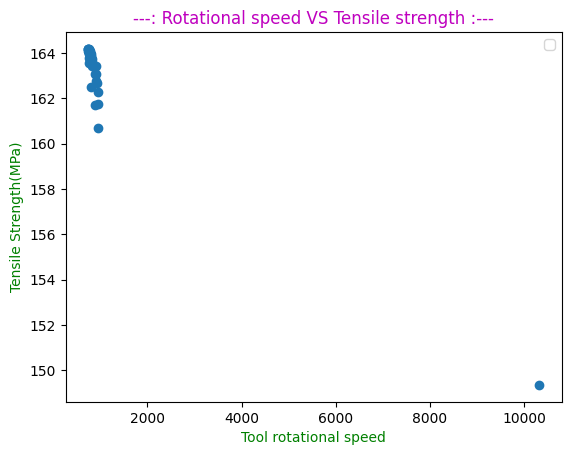

In [ ]:
plt.title("---: Rotational speed VS Tensile strength :---",color='m')
a=df.iloc[:,-7]
b=df.iloc[:,-1]
plt.xlabel('Tool rotational speed', color='g')
plt.ylabel('Tensile Strength(MPa)', color='g')
plt.scatter(a,b)
plt.legend()
plt.show()

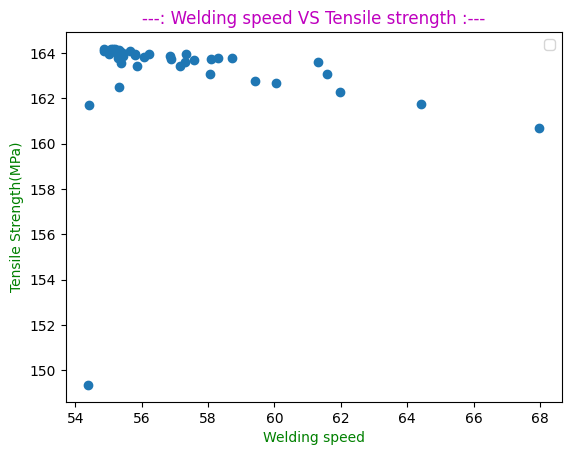

In [ ]:
plt.title("---: Welding speed VS Tensile strength :---",color='m')
a=df.iloc[:,-6]
b=df.iloc[:,-1]
plt.xlabel('Welding speed', color='g')
plt.ylabel('Tensile Strength(MPa)', color='g')
plt.scatter(a,b)
plt.legend()
plt.show()

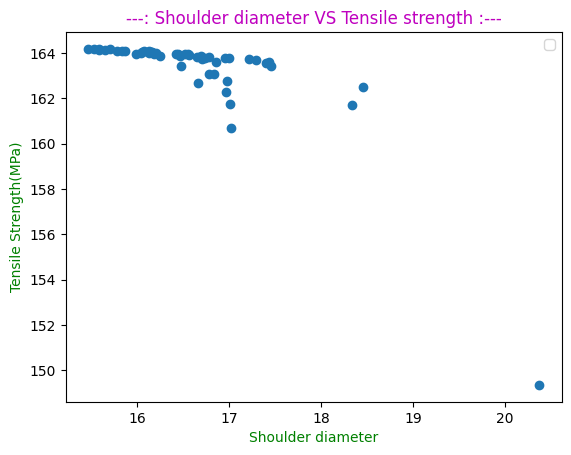

In [ ]:
plt.title("---: Shoulder diameter VS Tensile strength :---",color='m')
a=df.iloc[:,-5]
b=df.iloc[:,-1]
plt.xlabel('Shoulder diameter', color='g')
plt.ylabel('Tensile Strength(MPa)', color='g')
plt.scatter(a,b)
plt.legend()
plt.show()

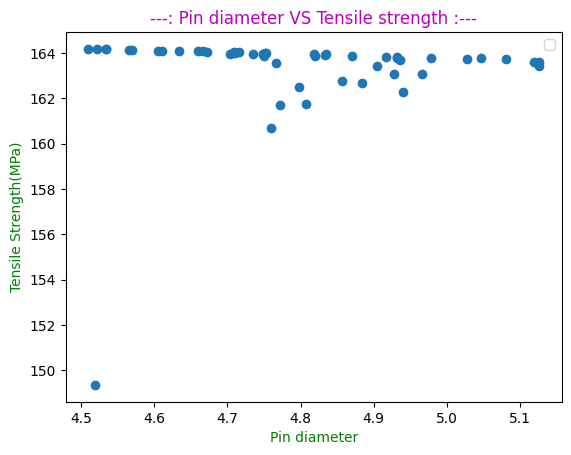

In [ ]:
plt.title("---: Pin diameter VS Tensile strength :---",color='m')
a=df.iloc[:,-4]
b=df.iloc[:,-1]
plt.xlabel('Pin diameter', color='g')
plt.ylabel('Tensile Strength(MPa)', color='g')
plt.scatter(a,b)
plt.legend()
plt.show()

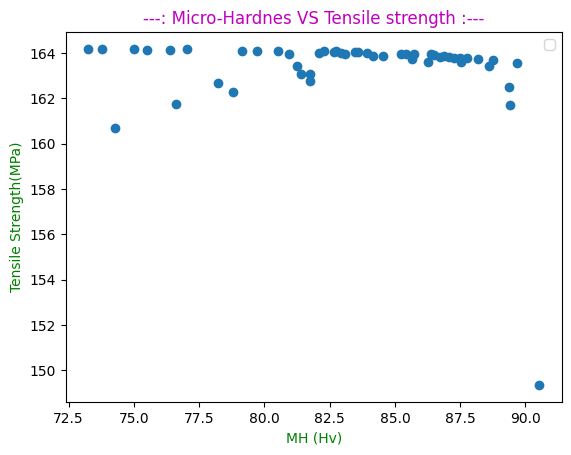

In [ ]:
plt.title("---: Micro-Hardnes VS Tensile strength :---",color='m')
a=df.iloc[:,-3]
b=df.iloc[:,-1]
plt.xlabel('MH (Hv)', color='g')
plt.ylabel('Tensile Strength(MPa)', color='g')
plt.scatter(a,b)
plt.legend()
plt.show()

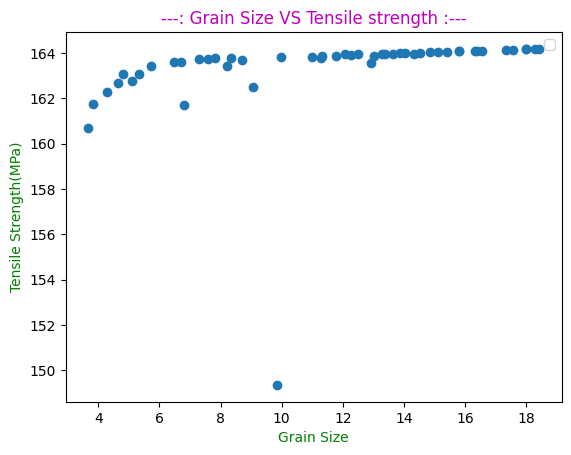

In [ ]:
plt.title("---: Grain Size VS Tensile strength :---",color='m')
a=df.iloc[:,-2]
b=df.iloc[:,-1]
plt.xlabel('Grain Size', color='g')
plt.ylabel('Tensile Strength(MPa)', color='g')
plt.scatter(a,b)
plt.legend()
plt.show()

# **For Output Feature: Grain Size**

In [ ]:
# Detect the encoding of the CSV file
with open('Al_Alloy_Dataset_GS.csv', 'rb') as f:
    encoding = chardet.detect(f.read())['encoding']

# Load the dataset with the correct encoding
df1 = pd.read_csv('Al_Alloy_Dataset_GS.csv', encoding=encoding)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   S. No.                 50 non-null     int64  
 1   Tool rotational speed  50 non-null     float64
 2   Welding speed          50 non-null     float64
 3   Shoulder diameter      50 non-null     float64
 4   Pin diameter           50 non-null     float64
 5   MH (Hv)                50 non-null     float64
 6   TS (MPa)               50 non-null     float64
 7   GS (um)                50 non-null     float64
dtypes: float64(7), int64(1)
memory usage: 3.2 KB


In [ ]:
df1.isnull().sum()

S. No.                   0
Tool rotational speed    0
Welding speed            0
Shoulder diameter        0
Pin diameter             0
MH (Hv)                  0
TS (MPa)                 0
GS (um)                  0
dtype: int64

In [ ]:
df1.describe()

,S. No.,Tool rotational speed,Welding speed,Shoulder diameter,Pin diameter,MH (Hv),TS (MPa),GS (um)
count,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,25.50000,990.319616,56.771395,16.610099,4.794116,83.148747,163.326954,11.467585
std,14.57738,1347.422757,2.701955,0.849233,0.168629,4.623423,2.144375,4.472539
min,1.00000,744.330300,54.393880,15.471210,4.509856,73.258440,149.354200,3.670076
25%,13.25000,759.609450,55.270555,16.088513,4.679998,80.643942,163.571125,7.637098
50%,25.50000,781.373850,55.410370,16.537420,4.768862,83.544620,163.887750,12.175670
75%,37.75000,814.259975,57.335693,16.964535,4.924803,86.855050,164.037375,15.036968
max,50.00000,10318.700000,67.976790,20.370970,5.126223,90.528370,164.180100,18.431130


In [ ]:
## Independent and Dependent features
X=df1.iloc[:,-7:-1] #independent features
y=df1.iloc[:,-1] #dependent features

In [ ]:
X

,Tool rotational speed,Welding speed,Shoulder diameter,Pin diameter,MH (Hv),TS (MPa)
0,744.6985,55.13440,15.52828,4.509856,73.78629,164.1801
1,953.5436,67.97679,17.02634,4.760160,74.28632,160.6917
2,924.7587,60.05896,16.66825,4.884400,78.22284,162.6840
3,744.3303,55.07571,15.47121,4.533599,73.25844,164.1725
4,822.5687,56.87548,16.70988,5.027076,85.67016,163.7404
5,749.4912,55.37223,17.40588,4.765945,89.66600,163.5661
6,767.9880,55.41288,16.20625,4.752309,83.94855,163.9994
7,805.0649,61.30265,16.86255,5.126223,86.28143,163.5862
8,798.9621,58.07987,17.21803,5.081272,88.18704,163.7148
9,10318.7000,54.39388,20.37097,4.519365,90.52837,149.3542


In [ ]:
y

0     18.431130
1      3.670076
2      4.626860
3     18.297340
4      7.572620
5     12.933680
6     14.033840
7      6.472903
8      7.284087
9      9.840378
10     6.788283
11    13.020550
12     3.814851
13     7.830531
14    18.004370
15     5.339841
16    11.320650
17     4.812104
18     4.294556
19    11.286570
20     9.988284
21    12.482210
22    13.382200
23    14.538590
24     8.343076
25     8.710359
26    16.378520
27    17.581750
28    11.791490
29    13.658820
30    16.564310
31    17.345030
32     9.060083
33    10.996570
34     6.698582
35    16.313430
36    18.010640
37    14.338520
38    13.286570
39    13.857950
40     5.104156
41    12.066170
42    15.819600
43    15.101520
44    12.285170
45    15.423630
46    14.843310
47    15.815790
48     8.195261
49     5.722416
Name: GS (um), dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((33, 6), (33,), (17, 6), (17,))

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

**K Nearest Neibour Regression Algorithm**

In [ ]:
## KNN Regression
from sklearn.neighbors import KNeighborsRegressor
regressor=KNeighborsRegressor(n_neighbors=6,algorithm='auto')
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.9237248352422904


**Decision Tree Regression Algorithm**

In [ ]:
## Decision Tress Regressor
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor()
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)
from sklearn.metrics import r2_score
score=r2_score(y_pred,y_test)
print(score)

0.8914664498310156


# **Study of variation of Grain Size based on different features**

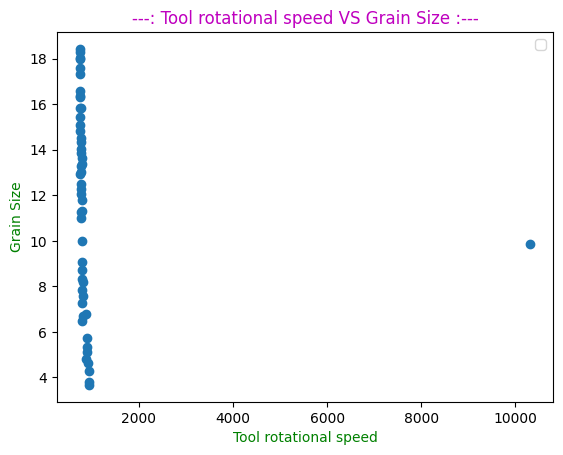

In [ ]:
plt.title("---: Tool rotational speed VS Grain Size :---",color='m')
a=df1.iloc[:,-7]
b=df1.iloc[:,-1]
plt.xlabel('Tool rotational speed', color='g')
plt.ylabel('Grain Size', color='g')
plt.scatter(a,b)
plt.legend()
plt.show()

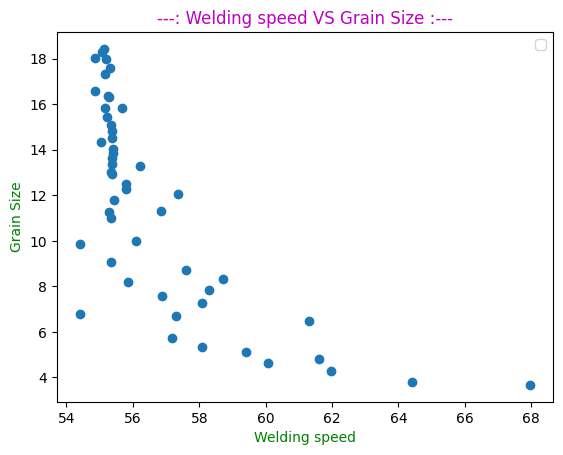

In [ ]:
plt.title("---: Welding speed VS Grain Size :---",color='m')
a=df1.iloc[:,-6]
b=df1.iloc[:,-1]
plt.xlabel('Welding speed', color='g')
plt.ylabel('Grain Size', color='g')
plt.scatter(a,b)
plt.legend()
plt.show()

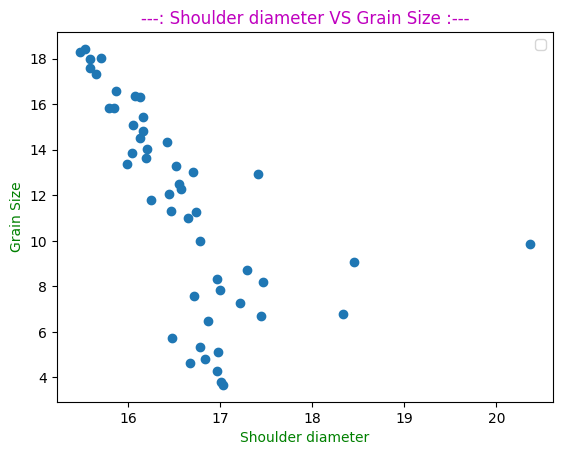

In [ ]:
plt.title("---: Shoulder diameter VS Grain Size :---",color='m')
a=df1.iloc[:,-5]
b=df1.iloc[:,-1]
plt.xlabel('Shoulder diameter', color='g')
plt.ylabel('Grain Size', color='g')
plt.scatter(a,b)
plt.legend()
plt.show()

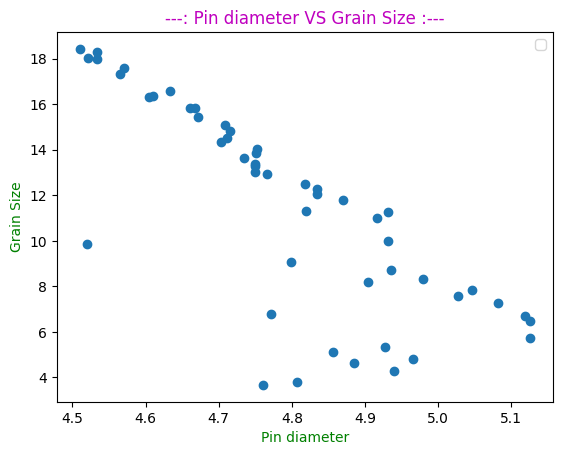

In [ ]:
plt.title("---: Pin diameter VS Grain Size :---",color='m')
a=df1.iloc[:,-4]
b=df1.iloc[:,-1]
plt.xlabel('Pin diameter', color='g')
plt.ylabel('Grain Size', color='g')
plt.scatter(a,b)
plt.legend()
plt.show()

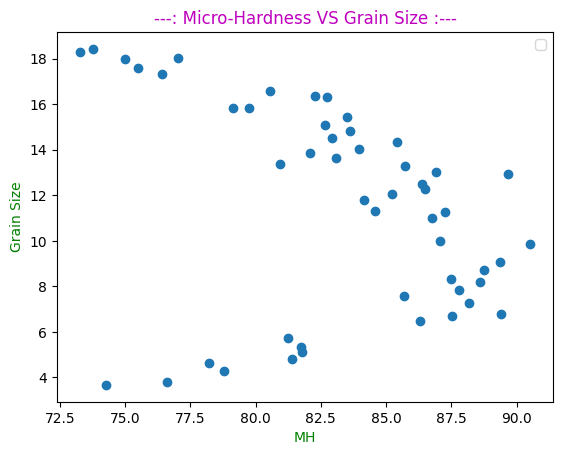

In [ ]:
plt.title("---: Micro-Hardness VS Grain Size :---",color='m')
a=df1.iloc[:,-3]
b=df1.iloc[:,-1]
plt.xlabel('MH', color='g')
plt.ylabel('Grain Size', color='g')
plt.scatter(a,b)
plt.legend()
plt.show()


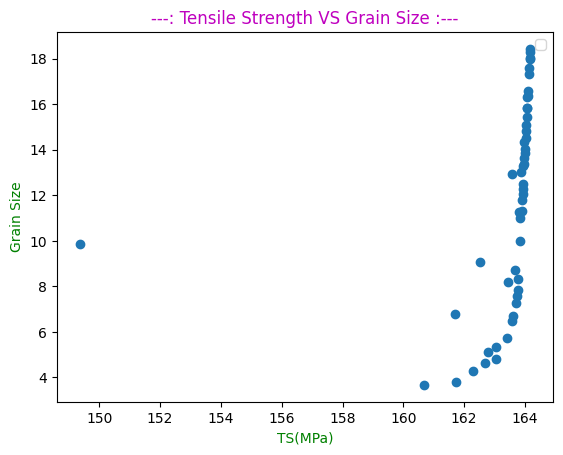

In [ ]:
plt.title("---: Tensile Strength VS Grain Size :---",color='m')
a=df1.iloc[:,-2]
b=df1.iloc[:,-1]
plt.xlabel('TS(MPa)', color='g')
plt.ylabel('Grain Size', color='g')
plt.scatter(a,b)
plt.legend()
plt.show()